# Decision Trees



# Entropy

In [1]:
#p1=0.5 and p2=0.5 
import math
entropy=-0.5*math.log2(0.5) -0.5*math.log2(0.5)
print("Entropy for 50%-50% case ==>", entropy)

Entropy for 50%-50% case ==> 1.0


In [2]:
entropy=-0.0001*math.log2(0.0001) -0.9999*math.log2(0.9999)
print("Entropy for 0%-100% case ==>", entropy)

Entropy for 0%-100% case ==> 0.0014730335283281598


In [3]:
import math
entropy=-0.45*math.log2(0.45) -0.55*math.log2(0.55)
print("Entropy for 45%-55% case ==>", entropy)

entropy=-0.05*math.log2(0.05) -0.95*math.log2(0.95)
print("Entropy for 5%-95% case ==>", entropy)

Entropy for 45%-55% case ==> 0.9927744539878084
Entropy for 5%-95% case ==> 0.28639695711595625


# Data Importing

In [4]:
#Import Data
import pandas as pd

Ecom_data = pd.read_csv("data/Ecom_Cust_Survey_v1.csv")

Ecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11805 entries, 0 to 11804
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cust_num              11805 non-null  int64 
 1   Region                11805 non-null  int64 
 2   Age                   11805 non-null  int64 
 3   Order_Quantity        11805 non-null  int64 
 4   Customer_Type         11805 non-null  object
 5   Overall_Satisfaction  11805 non-null  object
dtypes: int64(4), object(2)
memory usage: 553.5+ KB


In [5]:
Ecom_data['Overall_Satisfaction'].value_counts()

Overall_Satisfaction
Dis Satisfied    6408
Satisfied        5397
Name: count, dtype: int64

# Convert Non-numerical Data into numerical

In [6]:
Ecom_data['Customer_Type_num'] = Ecom_data['Customer_Type'].map({'Prime': 1, 'Non_Prime': 0}).astype(int)
print(Ecom_data['Customer_Type'].value_counts())
print(Ecom_data['Customer_Type_num'].value_counts())

Customer_Type
Prime        6804
Non_Prime    5001
Name: count, dtype: int64
Customer_Type_num
1    6804
0    5001
Name: count, dtype: int64


In [7]:
Ecom_data['Overall_Satisfaction_num'] = Ecom_data['Overall_Satisfaction'].map( {'Dis Satisfied': 0, 'Satisfied': 1} ).astype(int).astype(int)
print(Ecom_data['Overall_Satisfaction'].value_counts())
print(Ecom_data['Overall_Satisfaction_num'].value_counts())

Overall_Satisfaction
Dis Satisfied    6408
Satisfied        5397
Name: count, dtype: int64
Overall_Satisfaction_num
0    6408
1    5397
Name: count, dtype: int64


In [8]:
Ecom_data.columns

Index(['Cust_num', 'Region', 'Age', 'Order_Quantity', 'Customer_Type',
       'Overall_Satisfaction', 'Customer_Type_num',
       'Overall_Satisfaction_num'],
      dtype='object')

# Decision Tree Model Building

In [38]:
from sklearn import tree

features= ['Region', 'Age', 'Order_Quantity',  'Customer_Type_num']
print("Features",features)

X = Ecom_data[features]
print("X shape", X.shape)
y = Ecom_data['Overall_Satisfaction']
print("Y shape", y.shape)

Features ['Region', 'Age', 'Order_Quantity', 'Customer_Type_num']
X shape (11805, 4)
Y shape (11805,)


|--- Order_Quantity <= 40.50
|   |--- Age <= 29.50
|   |   |--- class: Satisfied
|   |--- Age >  29.50
|   |   |--- class: Dis Satisfied
|--- Order_Quantity >  40.50
|   |--- Age <= 20.50
|   |   |--- class: Satisfied
|   |--- Age >  20.50
|   |   |--- class: Satisfied



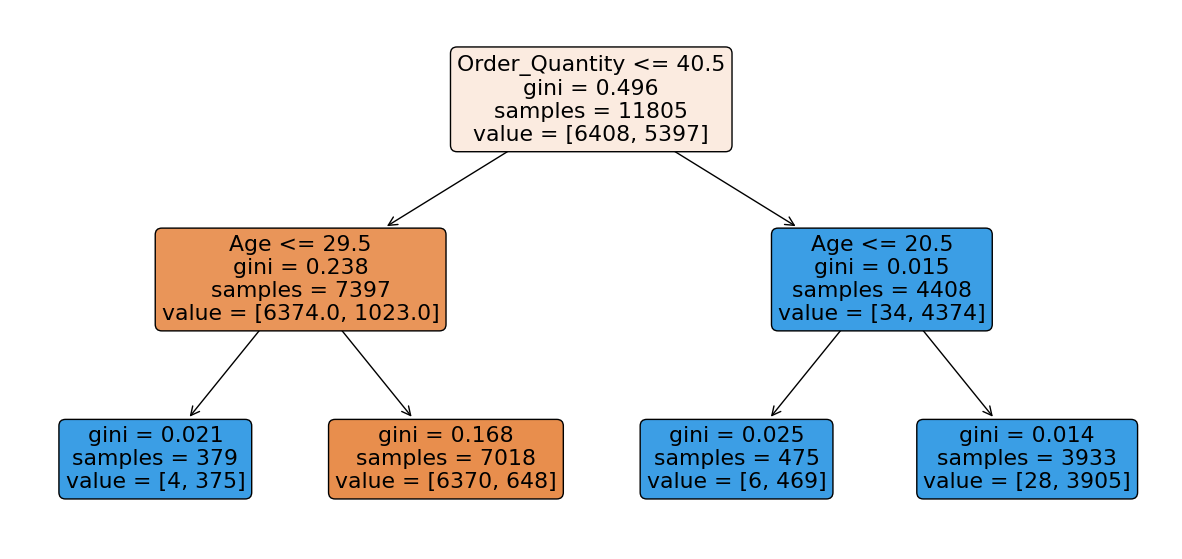

In [39]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=2)
DTree.fit(X,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=True,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

In [28]:
DTree._estimator_type

'classifier'

# Tree Validation

In [33]:
##########Tree Validation
#Tree Validation
predict1 = DTree.predict(X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
cm = confusion_matrix(y, predict1)
print ("confusion_matrix: ")
print (cm)

total = sum(sum(cm))
#####from confusion matrix calculate accuracy
accuracy = (cm[0,0]+cm[1,1])/total
miss_classification_rate=(cm[0,1]+cm[1,0])/total

print("accuracy :",accuracy)
print("miss_classification_rate: ",miss_classification_rate)

confusion_matrix: 
[[6370   38]
 [ 648 4749]]
accuracy : 0.9418890300720034
miss_classification_rate:  0.05811096992799661


# The problem of overfitting

In [14]:
#Datasets: Diabetes
#Import both test and training data

train = pd.read_csv("data/diabetes_train.csv")
test = pd.read_csv("data/diabetes_test.csv")

print(train.sample(5))

     Count_Pregnancies  Glucose_level  BP  SkinThickness_index  Insulin_level  \
433                  0            146  82                    0              0   
125                  1            125  70                   24            110   
151                  6            166  74                    0              0   
305                  3            176  86                   27            156   
465                  3            129  92                   49            155   

      BMI  DiabetesPedigreeFunction  Age  Diabetes_outcome  
433  40.5                     1.781   44                 0  
125  24.3                     0.221   25                 0  
151  26.6                     0.304   66                 0  
305  33.3                     1.154   52                 1  
465  36.4                     0.968   32                 1  


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Count_Pregnancies         614 non-null    int64  
 1   Glucose_level             614 non-null    int64  
 2   BP                        614 non-null    int64  
 3   SkinThickness_index       614 non-null    int64  
 4   Insulin_level             614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Diabetes_outcome          614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [16]:
train.isna().value_counts()

Count_Pregnancies  Glucose_level  BP     SkinThickness_index  Insulin_level  BMI    DiabetesPedigreeFunction  Age    Diabetes_outcome
False              False          False  False                False          False  False                     False  False               614
Name: count, dtype: int64

In [18]:
train["Diabetes_outcome"].value_counts()

Diabetes_outcome
0    410
1    204
Name: count, dtype: int64

In [20]:
train.shape

(614, 9)

In [40]:
from sklearn import tree

#Defining Features and lables
features=['Count_Pregnancies', 'Glucose_level', 'BP', 'SkinThickness_index', 
          'Insulin_level', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train = train[features]
y_train = train['Diabetes_outcome']

#X_train

X_test = test[features]
y_test = test['Diabetes_outcome']

In [94]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=16)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.8338762214983714
Test Accuracy 0.8116883116883117


# Pruning

## max_leaf_nodes - Finetuning , bcoz the grow of leaf nodea are linear

In [96]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 16)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 0.8338762214983714
Test Accuracy 0.8116883116883117
